In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits
import os
#spectrum_class.py NEEDS TO BE IN THE SAME FOLDER AS THIS FILE TO WORK
import spectrum_class    
import py_specrebin
poss_air_coeffs = {'edlen_1953':[6.4328e-5, 2.94981e-2, 2.5540e-4, 146.0, 41.0],
                   'edlen_1966':[8.34213e-5, 2.406030e-2, 1.5997e-4, 130.0, 38.9],
                   'peak_and_reeder_1972':[0.0, 5.791817e-2, 1.67909e-3, 238.0185, 57.362],
                   'ciddor_1996':[0.0, 5.792105e-2, 1.67917e-3, 238.0185, 57.362]}
air_coeffs = poss_air_coeffs['ciddor_1996']

import matplotlib.gridspec as gridspec
#matplotlib.rc('text',usetex=True)
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
plt.rc('font', **font)
light = 2.99792458e5 #speed of light in km/s
#classic wavelengths
Halpha = [6562.81]
Hbeta = [4861.34]
Magnesium = [5167.33, 5172.70, 5183.62]
Calcium = [8498.03, 8542.09, 8662.14]
Helium = [5914.12]
#lines = {r'H$\alpha$':np.array(Halpha),r'H$\beta$':np.array(Hbeta),'Ca Triplet':np.array(Calcium),'Mg Triplet':np.array(Magnesium)}
lineNames = [r'H$\alpha$',r'H$\beta$','Ca Triplet','Mg Triplet']
colorList = ['g','r','c','k']

#matplotlib.rc('text',usetex=True)
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
matplotlib.rc('font', **font)

pypeit_path = f'/Volumes/Jiamu4/2020feb26_pypeit_red/hgc{n}a/coadd1d_results/'
pypeit = fits.open(pypeit_path + pypeit_file)

wave = pypeit[1].data['wave']
wave = wave/((air_coeffs[0] + \
                         air_coeffs[1]/(air_coeffs[3]-np.power(wave,-2)) + \
                         air_coeffs[2]/(air_coeffs[4]-np.power(wave,-2))) + 1)
flux = pypeit[1].data['flux']
ivar = pypeit[1].data['ivar']

#sky = pypeit[1].data['telluric']
#

#read in spec2d files
#mask_name = 'hgc1a'
spec2dpath = f'/Volumes/Jiamu4/2020feb26_spec2d_red/hgc{n}a/'

spec = spectrum_class.simple_Spectrum(filepath)

spec2d_wave = spec.lam
spec2d_flux = spec.flux
spec2d_ivar = spec.ivar

spec2d_sky = spec.sky

wave_bounds = 7000,7500
pypeit_region = (wave > wave_bounds[0]) & (wave < wave_bounds[1])
pypeit_norm = np.median(flux[pypeit_region])
flux = flux/pypeit_norm
ivar = ivar*pypeit_norm**2

spec2d_region = (spec2d_wave > wave_bounds[0]) & (spec2d_wave < wave_bounds[1])
spec2d_norm = np.median(spec2d_flux[spec2d_region])
spec2d_flux = spec2d_flux/spec2d_norm
spec2d_ivar = spec2d_ivar*spec2d_norm**2

flux_err = 1/np.sqrt(ivar)
spec2d_flux_err = 1/np.sqrt(spec2d_ivar)

minwave = np.argmin(wave)
maxwave = np.argmax(wave)

#find chip gap
chip_gap_ind = np.argmax(np.diff(wave))
chip_gap_waves = wave[[chip_gap_ind,chip_gap_ind+1]]

#fit continuum
wavedist = 100
med_fitting = np.zeros(len(wave))
for ind in range(len(wave)):
    interval = (wave >= wave[ind]-wavedist) & (wave <= wave[ind]+wavedist)
    med_fitting[ind] = np.median(flux[interval])
    #med = np.median(flux[ind:ind+50])
    #med_fitting.append(med)
med_fitting=np.array(med_fitting)
#             plt.figure(figsize=(15,5))
#             plt.plot(wave,flux)
#             plt.plot(wave,med_fitting)

spec2d_med_fitting = np.zeros(len(spec2d_wave))
for spec2d_ind in range(len(spec2d_wave)):
    spec2d_interval = (spec2d_wave >= spec2d_wave[spec2d_ind]-wavedist) &\
    (spec2d_wave <= spec2d_wave[spec2d_ind]+wavedist)
    spec2d_med_fitting[spec2d_ind] = np.median(spec2d_flux[spec2d_interval])
    #med = np.median(flux[ind:ind+50])
    #med_fitting.append(med)
spec2d_med_fitting=np.array(spec2d_med_fitting)
#             plt.figure(figsize=(15,5))
#             plt.plot(spec2d_wave,spec2d_flux)
#             plt.plot(spec2d_wave,spec2d_med_fitting)

#plot continuum normalized spectra
#             plt.figure(figsize=(15,5))
#             #plt.plot(wave[(flux>0.1)&(med_fitting>0.1)],(flux/med_fitting)[(flux>0.1)&(med_fitting>0.1)])
flux_contnorm = flux/med_fitting
flux_err_contnorm = flux_err/med_fitting

spec2d_flux_contnorm = spec2d_flux/spec2d_med_fitting
spec2d_flux_err_contnorm = spec2d_flux_err/spec2d_med_fitting
#             plt.plot(wave,flux/med_fitting)
#             plt.plot(spec2d_wave,spec2d_flux/spec2d_med_fitting)
#             plt.ylim(0,2)

# Rebin Spectra
keep_spec2d = (spec2d_flux_contnorm > 0.05)
keep_pypeit = (flux_contnorm > 0.05)
final_pypeit = np.array([wave,flux_contnorm,flux_err_contnorm])[:,keep_pypeit]
final_spec2d = np.array([spec2d_wave,spec2d_flux_contnorm,spec2d_flux_err_contnorm])[:,keep_spec2d]

new_flux,new_ivar = py_specrebin.rebinspec(final_pypeit[0],final_pypeit[1],final_spec2d[0],ivar=np.power(final_pypeit[2],-2))
new_flux_err = 1/np.sqrt(new_ivar)

NameError: name 'n' is not defined

In [3]:
pypeit_1d_0 = fits.open('/Volumes/Jiamu4/2020feb26_pypeit_red/hgc2a_new/keck_deimos_A/det26/Science/spec1d_d0226_0067-hgc2a_DEIMOS_2020Feb26T070239.091.fits')
pypeit_1d_1 = fits.open('/Volumes/Jiamu4/2020feb26_pypeit_red/hgc2a_new/keck_deimos_A/det26/Science/spec1d_d0226_0068-hgc2a_DEIMOS_2020Feb26T072148.125.fits')
pypeit_1d_2 = fits.open('/Volumes/Jiamu4/2020feb26_pypeit_red/hgc2a_new/keck_deimos_A/det26/Science/spec1d_d0226_0069-hgc2a_DEIMOS_2020Feb26T074114.438.fits')

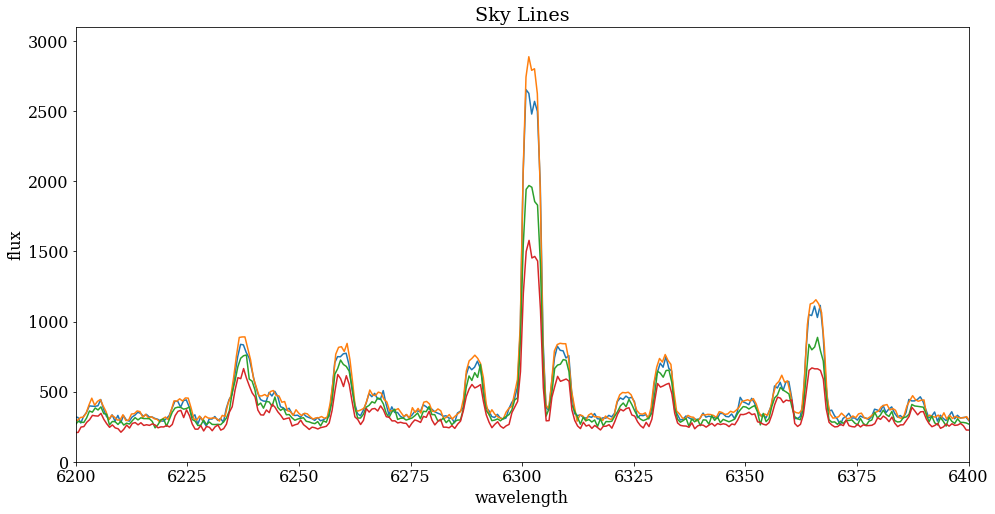

In [4]:
sky_1d_0 = pypeit_1d_0[1].data['OPT_COUNTS_SKY']
wave_1d_0 = pypeit_1d_0[1].data['OPT_WAVE']

sky_1d_00 = pypeit_1d_0[2].data['OPT_COUNTS_SKY']
wave_1d_00 = pypeit_1d_0[2].data['OPT_WAVE']

sky_1d_1 = pypeit_1d_1[1].data['OPT_COUNTS_SKY']
wave_1d_1 = pypeit_1d_1[1].data['OPT_WAVE']

sky_1d_2 = pypeit_1d_2[1].data['OPT_COUNTS_SKY']
wave_1d_2 = pypeit_1d_2[1].data['OPT_WAVE']

plt.figure(figsize=(16,8))
plt.xlim(6200,6400)
plt.ylim(0,3100)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.plot(wave_1d_0,sky_1d_0,label='pypeit')
plt.plot(wave_1d_00,sky_1d_00,label='pypeit')
plt.plot(wave_1d_1,sky_1d_1,label='pypeit')
plt.plot(wave_1d_2,sky_1d_2,label='pypeit')
plt.title('Sky Lines')

#finding the wavelength where the skylines are significant
#threshold skyline flux
th = 300
skyline_range = np.where(sky_1d_1 > th)[0]
skyline_wave = wave_1d_0[skyline_range]
#plt.plot(wave_1d[skyline_range],sky_1d[skyline_range],label='pypeit',color='r')

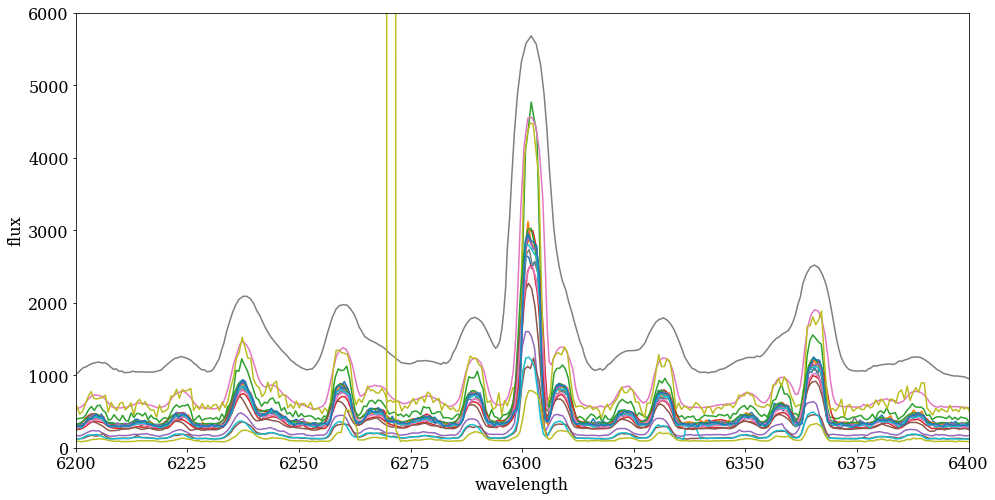

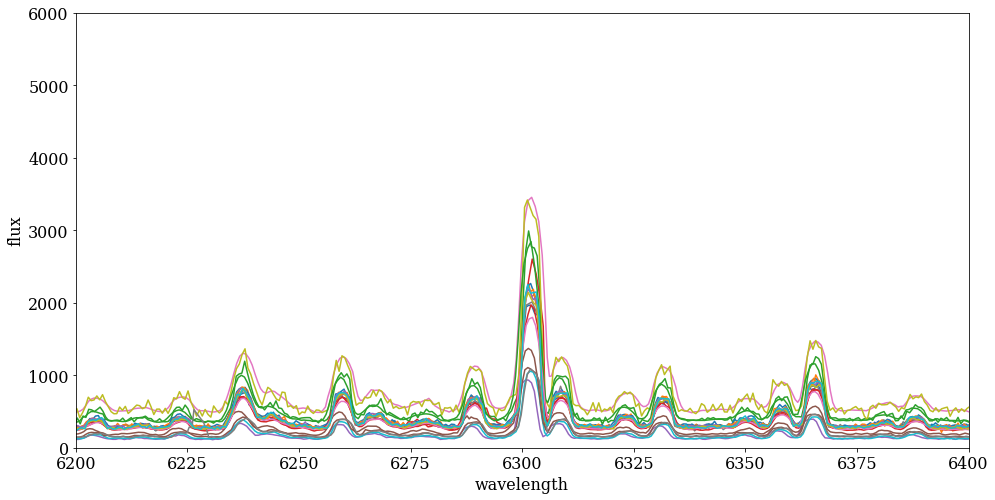

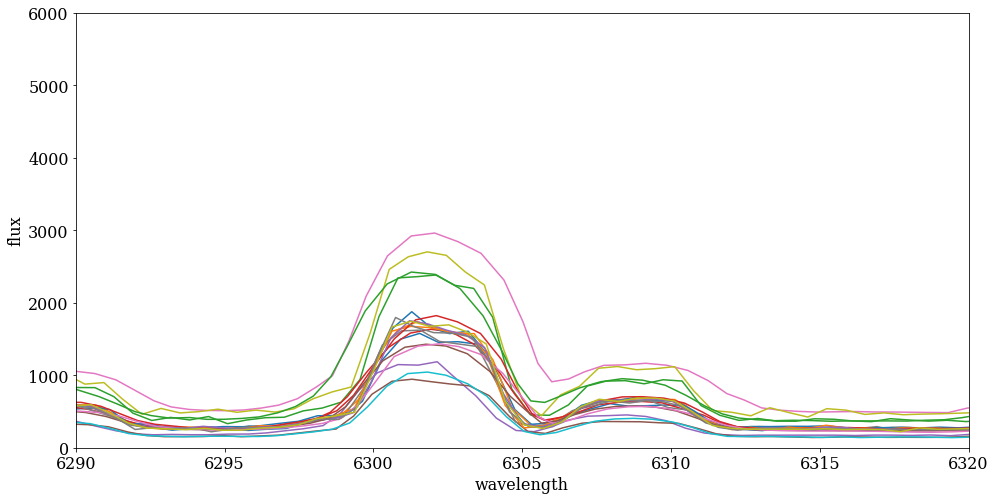

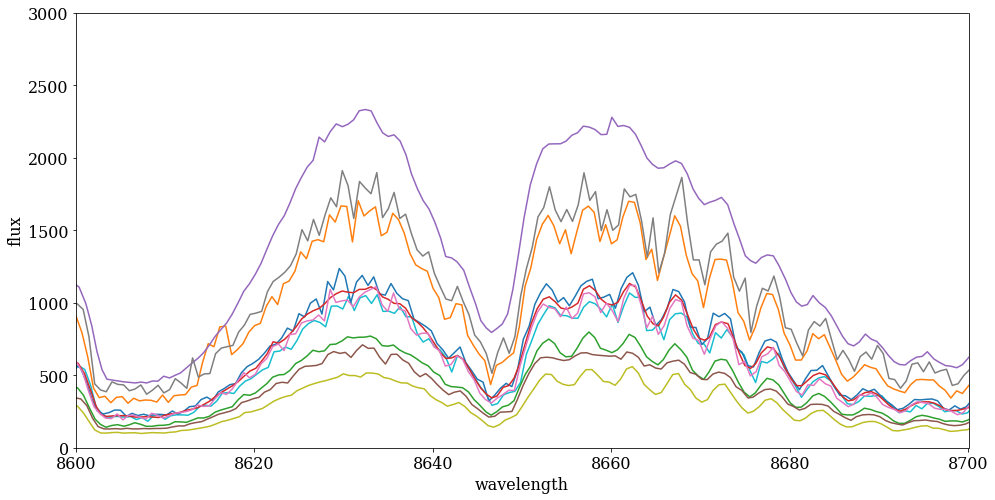

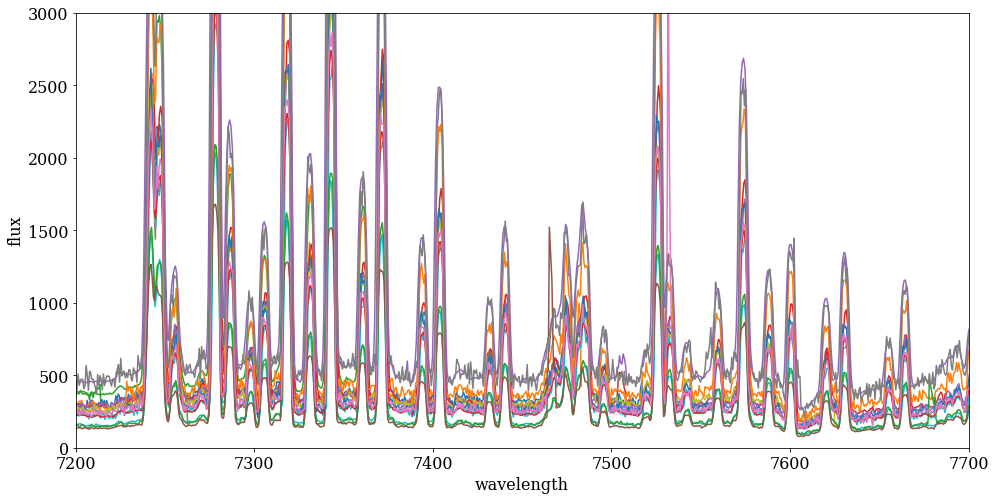

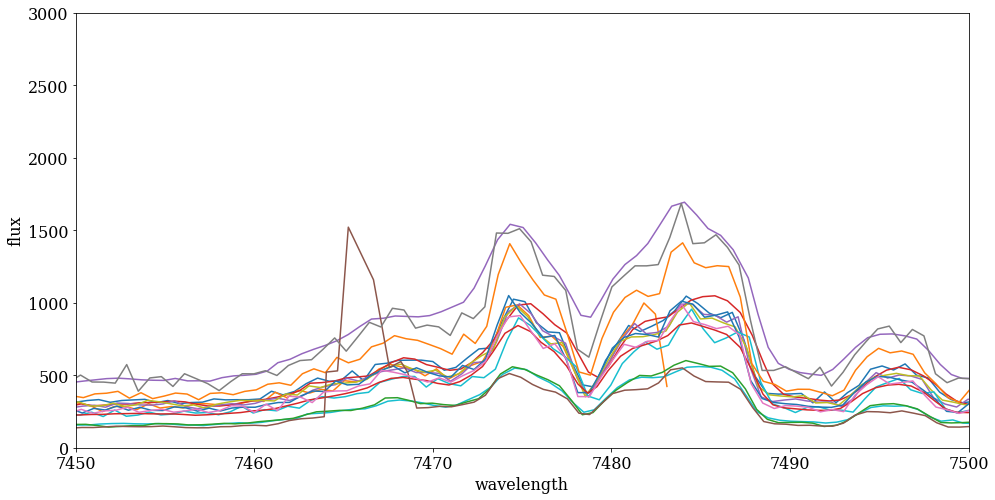

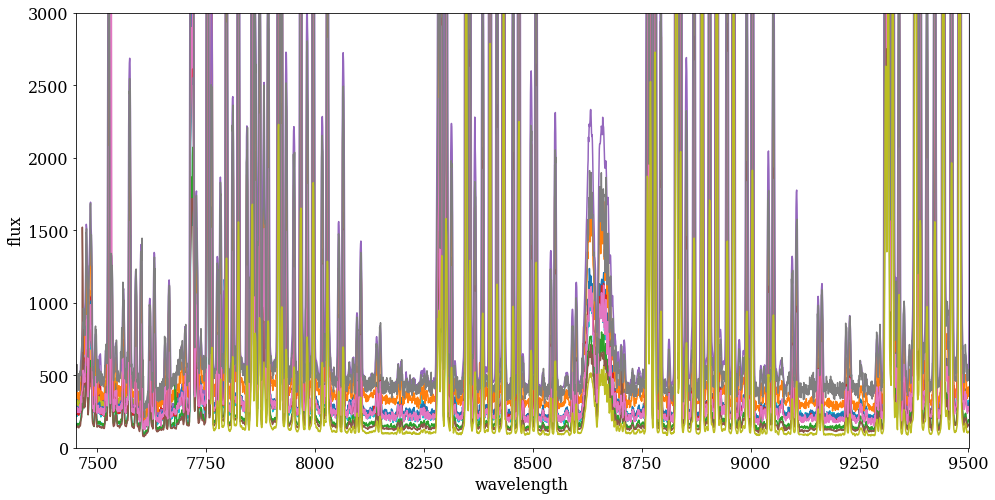

In [5]:
plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_0[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_0[ind].data['OPT_WAVE']
    plt.xlim(6200,6400)
    plt.ylim(0,6000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')
    
plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_1[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_1[ind].data['OPT_WAVE']
    plt.xlim(6200,6400)
    plt.ylim(0,6000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')
    
plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_2[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_2[ind].data['OPT_WAVE']
    plt.xlim(6290,6320)
    plt.ylim(0,6000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')
    
plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_2[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_2[ind].data['OPT_WAVE']
    plt.xlim(8600,8700)
    plt.ylim(0,3000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')
    
plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_2[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_2[ind].data['OPT_WAVE']
    plt.xlim(7200,7700)
    plt.ylim(0,3000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')

plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_2[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_2[ind].data['OPT_WAVE']
    plt.xlim(7450,7500)
    plt.ylim(0,3000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')
    
plt.figure(figsize=(16,8))
for ind in range(1,30):
    sky_1d = pypeit_1d_2[ind].data['OPT_COUNTS_SKY']
    wave_1d = pypeit_1d_2[ind].data['OPT_WAVE']
    plt.xlim(7450,9500)
    plt.ylim(0,3000)
    plt.xlabel('wavelength')
    plt.ylabel('flux')
    plt.plot(wave_1d,sky_1d,label='pypeit')

In [ ]:
plt.figure(figsize=(16,8))
#plt.xlim(6200,6400)
plt.ylim(0,3100)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.plot(wave_1d_0,sky_1d_0,label='pypeit')
plt.plot(wave_1d_1,sky_1d_1,label='pypeit')
plt.plot(wave_1d_2,sky_1d_2,label='pypeit')
plt.title('Sky Lines')

In [ ]:
pypeit_path = f'/Volumes/Jiamu4/2020feb26_pypeit_red/hgc{n}a/coadd1d_results/'
pypeit = fits.open(pypeit_path + pypeit_file)

wave = pypeit[1].data['wave']
wave = wave/((air_coeffs[0] + \
                         air_coeffs[1]/(air_coeffs[3]-np.power(wave,-2)) + \
                         air_coeffs[2]/(air_coeffs[4]-np.power(wave,-2))) + 1)
flux = pypeit[1].data['flux']
ivar = pypeit[1].data['ivar']

#sky = pypeit[1].data['telluric']
#

#read in spec2d files
#mask_name = 'hgc1a'
spec2dpath = f'/Volumes/Jiamu4/2020feb26_spec2d_red/hgc{n}a/'

spec = spectrum_class.simple_Spectrum(filepath)

spec2d_wave = spec.lam
spec2d_flux = spec.flux
spec2d_ivar = spec.ivar

spec2d_sky = spec.sky

wave_bounds = 7000,7500
pypeit_region = (wave > wave_bounds[0]) & (wave < wave_bounds[1])
pypeit_norm = np.median(flux[pypeit_region])
flux = flux/pypeit_norm
ivar = ivar*pypeit_norm**2

spec2d_region = (spec2d_wave > wave_bounds[0]) & (spec2d_wave < wave_bounds[1])
spec2d_norm = np.median(spec2d_flux[spec2d_region])
spec2d_flux = spec2d_flux/spec2d_norm
spec2d_ivar = spec2d_ivar*spec2d_norm**2

flux_err = 1/np.sqrt(ivar)
spec2d_flux_err = 1/np.sqrt(spec2d_ivar)